In [ ]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp37-none-any.whl size=4359 sha256=8d77e5b937d3d3b90809795371a8085c2d08e6181e9781814622b99069a4e276
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt

img shpae (760, 1140, 3)


<function matplotlib.pyplot.show>

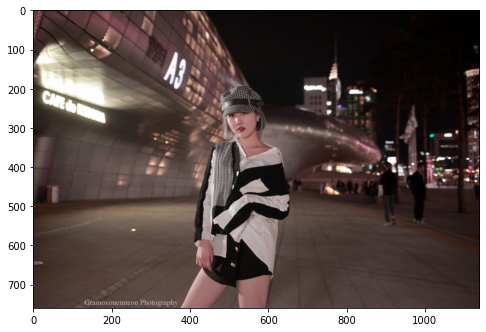

In [ ]:
img = cv2.imread('/content/drive/MyDrive/인프런 - 딥러닝 컴퓨터 비전 완벽가이드/Files/Selective_search/Selective_search_picture.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shpae', img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show

<function matplotlib.pyplot.show>

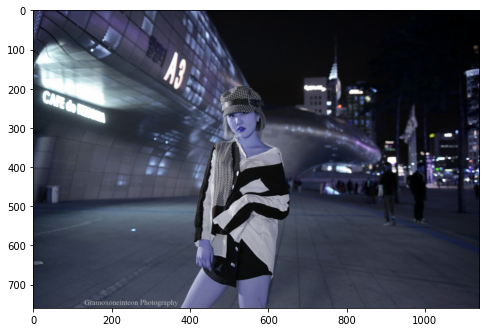

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show

In [ ]:
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2500)

print(type(regions), len(regions))

<class 'list'> 97


In [ ]:
regions[:10]

[{'labels': [0.0], 'rect': (0, 0, 200, 140), 'size': 11061},
 {'labels': [1.0], 'rect': (58, 0, 319, 205), 'size': 20781},
 {'labels': [2.0], 'rect': (156, 0, 141, 122), 'size': 5162},
 {'labels': [3.0], 'rect': (217, 0, 268, 302), 'size': 16006},
 {'labels': [4.0], 'rect': (316, 0, 134, 115), 'size': 7776},
 {'labels': [5.0], 'rect': (405, 0, 162, 236), 'size': 16602},
 {'labels': [6.0], 'rect': (448, 0, 691, 323), 'size': 143904},
 {'labels': [7.0], 'rect': (22, 17, 111, 89), 'size': 3305},
 {'labels': [8.0], 'rect': (194, 47, 219, 208), 'size': 3341},
 {'labels': [9.0], 'rect': (0, 87, 328, 157), 'size': 15483}]

In [ ]:
# 좌표값만 받아서 cand_rects에 따로 저장
# (x_1, y_1, width, height) 이다.

cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 200, 140), (58, 0, 319, 205), (156, 0, 141, 122), (217, 0, 268, 302), (316, 0, 134, 115), (405, 0, 162, 236), (448, 0, 691, 323), (22, 17, 111, 89), (194, 47, 219, 208), (0, 87, 328, 157), (0, 87, 515, 406), (21, 146, 188, 95), (74, 148, 106, 39), (1002, 151, 137, 368), (731, 153, 153, 181), (546, 163, 247, 141), (477, 199, 105, 129), (829, 213, 127, 201), (933, 232, 95, 188), (495, 246, 354, 226), (315, 282, 203, 310), (1097, 305, 42, 122), (742, 321, 144, 96), (0, 325, 56, 80), (458, 336, 203, 203), (414, 356, 81, 312), (952, 365, 52, 172), (859, 369, 71, 125), (683, 389, 212, 81), (306, 391, 137, 121), (964, 393, 175, 226), (893, 396, 106, 159), (0, 403, 39, 89), (163, 413, 84, 67), (242, 417, 73, 59), (1085, 424, 54, 98), (648, 427, 248, 107), (0, 450, 419, 121), (460, 471, 192, 88), (487, 491, 165, 79), (594, 492, 545, 267), (168, 503, 247, 29), (434, 506, 175, 201), (500, 513, 124, 166), (0, 514, 440, 245), (163, 616, 180, 134), (378, 660, 115, 99), (508, 675, 104, 84), (

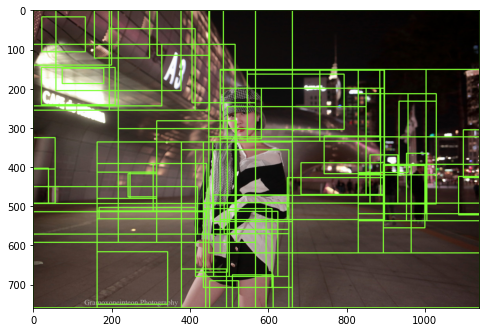

In [ ]:
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

# Interscetion over Union 방식

In [ ]:
import numpy as np

# candidate box, ground truth box
def compute_iou(cand_box, gt_box):
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3]. gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union
  return iou  